In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import os

In [6]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteQN7CFI\imdb_reviews-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteQN7CFI\imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling ~\tensorflow_datasets\imdb_reviews\plain_text\1.0.0.incompleteQN7CFI\imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [7]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='~\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
     

In [8]:
print(imdb)

{Split('train'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [9]:
type(imdb), type(info)

(dict, tensorflow_datasets.core.dataset_info.DatasetInfo)

In [12]:
print(list(imdb.keys()))

[Split('train'), Split('test'), Split('unsupervised')]


In [13]:
type(list(imdb.keys())[0])

tensorflow_datasets.core.splits.Split

In [20]:
for example in imdb['train'].take(2):
    print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [21]:
print(example[0])
print(example[1])

tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of what was causing them or why. I admit, I may have missed part of the film, but i watched the majority of it and everything just seemed to happen of its own accord without any real concern for anything else. I cant recommend this film at all.', shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [22]:
type(imdb['train'])

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [24]:
trn_txs, trn_lbs = [], []
tst_txs, tst_lbs = [], []

for tx, lb in imdb['train']:
    trn_txs.append(tx.numpy().decode('utf8'))
    trn_lbs.append(lb.numpy())
    
for tx, lb in imdb['test']:
    tst_txs.append(tx.numpy().decode('utf8'))
    tst_lbs.append(lb.numpy())

trn_lbs = np.array(trn_lbs)
tst_lbs = np.array(tst_lbs)

In [25]:
num_words = 10000
maxlen = 120
embed_d = 16

In [26]:
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(trn_txs)

trn_sqs = tokenizer.texts_to_sequences(trn_txs)
trn_sqs = pad_sequences(trn_sqs, padding='post', maxlen=maxlen, truncating='post')

tst_sqs = tokenizer.texts_to_sequences(tst_txs)
tst_sqs = pad_sequences(tst_sqs, padding='post', maxlen=maxlen, truncating='post')

In [31]:
model = keras.models.Sequential([
    keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
    keras.layers.Flatten(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 11526     
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [32]:
%%time

history = model.fit(trn_sqs, trn_lbs, epochs=10, validation_data=(tst_sqs, tst_lbs))

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.4865 - accuracy: 0.7482 - val_loss: 0.4071 - val_accuracy: 0.8152
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2397 - accuracy: 0.9066 - val_loss: 0.4041 - val_accuracy: 0.8205
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0962 - accuracy: 0.9750 - val_loss: 0.5120 - val_accuracy: 0.8073
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0251 - accuracy: 0.9968 - val_loss: 0.5936 - val_accuracy: 0.8095
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0065 - accuracy: 0.9994 - val_loss: 0.6813 - val_accuracy: 0.8081
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.7377 - val_accuracy: 0.8110
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.7916 - val_accuracy: 0.8101
Epoch 

In [51]:
import utilities

from importlib import reload
reload(utilities)

<module 'utilities' from 'C:\\Users\\Jing Lin\\Documents\\code\\coursera-tensorflow-cert\\utilities.py'>

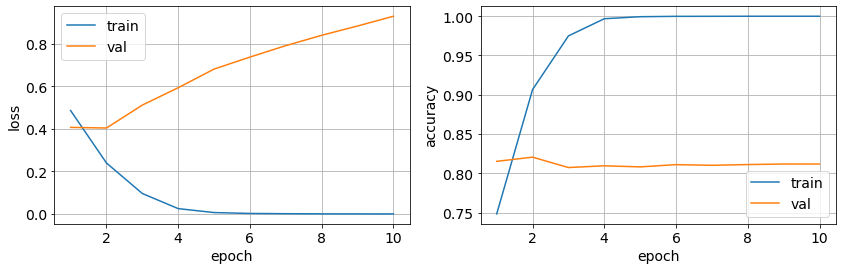

In [36]:
utilities.plot_train_val_metrics(history, metrics=('loss', 'accuracy'))

In [40]:
model.layers[0].get_weights()[0].shape

(10000, 16)

In [52]:
utilities.save_tsv(model, tokenizer, os.path.join('data', 'imdb', 'imdb'))

In [55]:
model2 = keras.models.Sequential([
    keras.layers.Embedding(num_words, embed_d, input_length=maxlen),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model2.summary()

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 6)                 102       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [56]:
%%time

history2 = model2.fit(trn_sqs, trn_lbs, epochs=10, validation_data=(tst_sqs, tst_lbs))

Epoch 1/10
782/782 [==============================] - 4s 4ms/step - loss: 0.5638 - accuracy: 0.7474 - val_loss: 0.4279 - val_accuracy: 0.8168
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3427 - accuracy: 0.8585 - val_loss: 0.3742 - val_accuracy: 0.8328
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2769 - accuracy: 0.8876 - val_loss: 0.3724 - val_accuracy: 0.8352
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2397 - accuracy: 0.9060 - val_loss: 0.3818 - val_accuracy: 0.8346
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2137 - accuracy: 0.9195 - val_loss: 0.4031 - val_accuracy: 0.8303
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1921 - accuracy: 0.9300 - val_loss: 0.4286 - val_accuracy: 0.8262
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1744 - accuracy: 0.9377 - val_loss: 0.4595 - val_accuracy: 0.8203
Epoch 

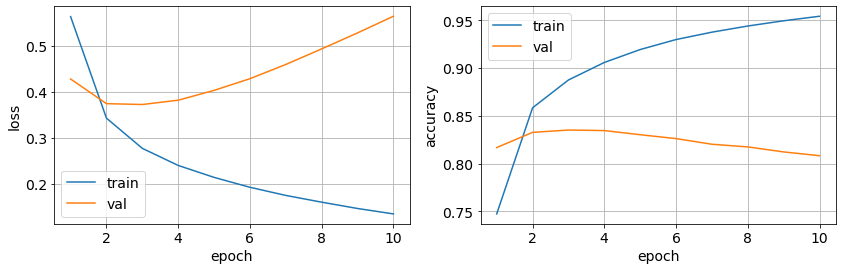

In [57]:
utilities.plot_train_val_metrics(history2, metrics=('loss', 'accuracy'))

In [58]:
utilities.save_tsv(model, tokenizer, os.path.join('data', 'imdb', 'imdb-pool'))